In [1]:
#Importing all the required libraries
import requests
import json
import pandas as pd
import numpy as np
import os
from collections import Counter
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis

## Fetching Data using APi


Using Plotly API fetch the chart data scripts

In [52]:
resp = requests.get("https://api.plotly.com/v2/plots/")
a = resp.json()
a['results'][5]['figure']['data'][0]

{'link': {'valuesrc': 'Compass361:44:ec226d',
  'sourcesrc': 'Compass361:44:c3e755',
  'targetsrc': 'Compass361:44:98766b'},
 'node': {'pad': 10,
  'line': {'width': 0.5, 'colorsrc': 'Compass361:44:ccfe68'},
  'colorsrc': 'Compass361:44:1ec867',
  'labelsrc': 'Compass361:44:d57d05',
  'thickness': 30},
 'type': 'sankey',
 'domain': {'x': [0, 1], 'y': [0, 1]},
 'orientation': 'h',
 'valueformat': '.0f'}

In [13]:
# Bar plots
dir='Bar5000'
list = os.listdir(dir) # dir is your directory path
number_files = len(list)

old='/'
new='.json'
j=1
while number_files<5000:
    a = resp.json()
    
    try:
        for i in range(len(a['results'])):
            if a['results'][i]['figure']['data'][0]['type']=='bar':
                our_url = a['results'][i]['web_url']
                result = new.join(our_url.rsplit(old, 1))
                ans = requests.get(result)
                filename = str(j)+str(i)
                with open('Bar5000/'+filename+'.json', 'w') as outfile:
                    json.dump(ans.json(), outfile)
                list1 = os.listdir(dir)
                number_files = len(list1)
    except:
        pass
    
    resp = requests.get(a['next'])
    j+=1
            
                
            

In [49]:
##  Scatter - Markers
dir='ScatterMarkers5000'
list2 = os.listdir(dir) # dir is your directory path
number_files2 = len(list2)



old='/'
new='.json'
j=1
while number_files2<5000:
    a = resp.json()
    
    try:
        for i in range(len(a['results'])):
            if (a['results'][i]['figure']['data'][0]['type']=='scatter'):
                if (a['results'][i]['figure']['data'][0]['mode']=='markers'):
                    our_url = a['results'][i]['web_url']
                    result = new.join(our_url.rsplit(old, 1))
                    ans = requests.get(result)
                    filename = str(j)+str(i)
                    with open('ScatterMarkers5000/'+filename+'.json', 'w') as outfile:
                        json.dump(ans.json(), outfile)
                    list2 = os.listdir(dir) # dir is your directory path
                    number_files2 = len(list2)
    except:
        pass

    resp = requests.get(a['next'])
    j+=1
    #print(number_files2)

In [ ]:
# Pie

dir='Pie5000'
list5 = os.listdir(dir) # dir is your directory path
number_files5 = len(list5)


old='/'
new='.json'
j=1
while number_files5<5000:
    a = resp.json()
    
    try:
        for i in range(len(a['results'])):
            if a['results'][i]['figure']['data'][0]['type']=='pie':
                our_url = a['results'][i]['web_url']
                result = new.join(our_url.rsplit(old, 1))
                ans = requests.get(result)
                filename = str(j)+str(i)
                with open('Pie5000/'+filename+'.json', 'w') as outfile:
                    json.dump(ans.json(), outfile)
                list5 = os.listdir(dir)
                number_files5 = len(list5)
    except:
        pass
    
    resp = requests.get(a['next'])
    j+=1

In [ ]:
##  Scatter - Lines
dir='ScatterLines5000'
list4 = os.listdir(dir) # dir is your directory path
number_files4 = len(list4)



old='/'
new='.json'
j=1
while number_files4<5000:
    a = resp.json()
    
    try:
        for i in range(len(a['results'])):
            if (a['results'][i]['figure']['data'][0]['type']=='scatter'):
                if (a['results'][i]['figure']['data'][0]['mode']=='lines'):
                    our_url = a['results'][i]['web_url']
                    result = new.join(our_url.rsplit(old, 1))
                    ans = requests.get(result)
                    filename = str(j)+str(i)
                    with open('ScatterLines5000/'+filename+'.json', 'w') as outfile:
                        json.dump(ans.json(), outfile)
                    list4 = os.listdir(dir) # dir is your directory path
                    number_files4 = len(list4)
    except:
        pass

    resp = requests.get(a['next'])
    j+=1
    print(j)

In [3]:
# Functions needed for feature extraction
def strtoint(n):
    return int(n)
def strtofloat(n):
    return float(n)

def countX(lst, x):
    count = 0
    for ele in lst:
        if (ele == x):
            count = count + 1
    return count

def non_increasing(L):
    return all(x>=y for x, y in zip(L, L[1:]))

def non_decreasing(L):
    return all(x<=y for x, y in zip(L, L[1:]))

def monotonic(L):
    if non_increasing(L):
        return -1
    elif non_decreasing(L):
        return 1
    else:
        return 0


## Feature Extraction

After downloading all JSON scripts now it is time to create our dataset


In [14]:
df1 = pd.DataFrame()

path_to_json = 'ScatterLines/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name) as json_file:
        js = pd.read_json(json_file,orient='index')
        
        try:
            #print(len(js))
            #print(js[0].data['x'][0])
            x1 = js[0].data['x'][0]
            y1 = js[0].data['y'][0]
            x2 = js[0].data['x']
            y2 = js[0].data['y']
            
            
            #check and convert if string is numeric
            try:
                if isinstance(int(x2[0]),int):
                    x2=[strtoint(i) for i in x2]
            except:
                pass

            try:
                if isinstance(float(x2[0]),float):
                    x2=[strtofloat(i) for i in x2]     
            except:
                pass

            try:
                if isinstance(int(y2[0]),int):
                    y2=[strtoint(i) for i in y2]
            except:
                pass

            try:
                if isinstance(float(y2[0]),float):
                    y2=[strtofloat(i) for i in y2]        
            except:
                pass
            
            xdate=''
            ydate=''
            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%b %d, %Y'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d %H:%M:%S'):
                    xdate = 'date'
            except:
                pass
            
            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%b %d, %Y'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d %H:%M:%S'):
                    ydate = 'date'
            except:
                pass
            
            x=''
            y=''
            
            
            if isinstance(x1,int) or isinstance(x1,float):
                x = 'numeric'
                
                xsd = np.std(x2)
                xavg = np.mean(x2)
                
                xmax = max(x2)
                xmin = min(x2)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(x2)
                xskew = skew(x2, bias=False)
                xkurt = kurtosis(x2, bias=False)

            elif xdate=='date':
                x='date'
                xep = [dt.fromisoformat(i).timestamp() for i in x2]
                
                xsd = np.std(xep)
                xavg = np.mean(xep)
                
                xmax = max(xep)
                xmin = min(xep)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(xep)
                xskew = skew(xep, bias=False)
                xkurt = kurtosis(xep, bias=False)

            elif xdate=='':
                x='string'
                xsd = None
                xavg = None
                resultx = [item for items, c in Counter(x2).most_common()
                                      for item in [items] * c]
                
                xmax = 0
                xmin = 0
                
                xmaxoccur=countX(x2,resultx[0])
                xminoccur=countX(x2,resultx[-1])
                xmono = 0   
                xskew = 0
                xkurt = 3
                
                
            if isinstance(y1,int) or isinstance(y1,float):
                y = 'numeric'
                ysd = np.std(y2)
                yavg = np.mean(y2)
                
                ymax = max(y2)
                ymin = min(y2)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(y2)
                yskew = skew(y2, bias=False)
                ykurt = kurtosis(y2, bias=False)

            elif ydate=='date':
                y='date'
                yep = [dt.fromisoformat(i).timestamp() for i in y2]
                
                ysd = np.std(yep)
                yavg = np.mean(yep)
                
                ymax = max(yep)
                xmin = min(yep)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(yep)
                yskew = skew(y2, bias=False)
                ykurt = kurtosis(y2, bias=False)
                
            elif ydate=='':
                y = 'string' 
                ysd = None
                yavg = None
                
                resulty = [item for items, c in Counter(y2).most_common()
                                      for item in [items] * c]
                ymax = 0
                ymin = 0
                
                ymaxoccur=countX(y2,resulty[0])
                yminoccur=countX(y2,resulty[-1])
                
                ymono = 0
                yskew = 0
                ykurt = 3
            thisdict = {
              "x type": [x],
              "y type": [y],
                "charttype" : js[0].data['mode'],
                "x std": [xsd],
                "y std": [ysd],
                "x avg": [xavg],
                "y avg": [yavg],
                "x max": [xmax],
                "x min": [xmin],
                "y max": [ymax],
                "y min": [ymin],
                "x len": [len(x2)],
                "y len": [len(y2)],
                "x uniq": [len(set(x2))],
                "y uniq": [len(set(y2))],
                "x mono": [xmono],
                "y mono": [ymono],
                "x skew": [xskew],
                "y skew": [yskew],
                "x kurt": [xkurt],
                "y kurt": [ykurt],
                "x maxoccur": [xmaxoccur],
                "x minoccur": [xminoccur],
                "y maxoccur": [ymaxoccur],
                "y minoccur": [yminoccur]
            }
            
            df1 = df1.append(thisdict, ignore_index=True)
        except:
            pass

    
    
df1    
            
            

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,lines,[99.5],[-1.2],[200],[199.0],[0],[0.0],[0],[1],[0.0],...,[200],[0],[1],[0],[1],[0],[0],[None],[string],[200]
1,lines,[None],[3],[210],[0],[1],[0],[1],[0],[0],...,[210],[0],[141],[0],[1],[0],[0],[None],[string],[20]
2,lines,[99.5],[-1.2],[200],[199.0],[0],[0.0],[0],[1],[0.0],...,[200],[0],[1],[0],[1],[0],[0],[None],[string],[200]
3,lines,[100.0],[-1.1999999999999997],[201],[200.0],[0],[0.0],[0],[1],[0.0],...,[201],[0],[2],[0],[1],[0],[0],[None],[string],[200]
4,lines,[100.0],[-1.1999999999999997],[201],[200.0],[0],[0.0],[0],[1],[0.0],...,[201],[0],[2],[0],[1],[0],[0],[None],[string],[200]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,lines,[99.5],[-1.2],[200],[199.0],[0],[0.0],[0],[1],[0.0],...,[200],[0],[1],[0],[1],[0],[0],[None],[string],[200]
1396,lines,[None],[3],[210],[0],[1],[0],[1],[0],[0],...,[210],[0],[10],[0],[1],[0],[0],[None],[string],[48]
1397,lines,[99.5],[-1.2],[200],[199.0],[0],[0.0],[0],[1],[0.0],...,[200],[0],[1],[0],[1],[0],[0],[None],[string],[200]
1398,lines,[100.0],[-1.1999999999999997],[201],[200.0],[0],[0.0],[0],[1],[0.0],...,[201],[0],[2],[0],[1],[0],[0],[None],[string],[200]


In [15]:
df2 = pd.DataFrame()

path_to_json = 'Bar/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name) as json_file:
        js = pd.read_json(json_file,orient='index')
        
        try:
            #print(len(js))
            #print(js[0].data['x'][0])
            x1 = js[0].data['x'][0]
            y1 = js[0].data['y'][0]
            x2 = js[0].data['x']
            y2 = js[0].data['y']
            
            
            #check and convert if string is numeric
            try:
                if isinstance(int(x2[0]),int):
                    x2=[strtoint(i) for i in x2]
            except:
                pass

            try:
                if isinstance(float(x2[0]),float):
                    x2=[strtofloat(i) for i in x2]     
            except:
                pass

            try:
                if isinstance(int(y2[0]),int):
                    y2=[strtoint(i) for i in y2]
            except:
                pass

            try:
                if isinstance(float(y2[0]),float):
                    y2=[strtofloat(i) for i in y2]        
            except:
                pass
            
            xdate=''
            ydate=''
            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%b %d, %Y'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d %H:%M:%S'):
                    xdate = 'date'
            except:
                pass
            
            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%b %d, %Y'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d %H:%M:%S'):
                    ydate = 'date'
            except:
                pass
            
            x=''
            y=''
            
            
            if isinstance(x1,int) or isinstance(x1,float):
                x = 'numeric'
                
                xsd = np.std(x2)
                xavg = np.mean(x2)
                
                xmax = max(x2)
                xmin = min(x2)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(x2)
                xskew = skew(x2, bias=False)
                xkurt = kurtosis(x2, bias=False)

            elif xdate=='date':
                x='date'
                xep = [dt.fromisoformat(i).timestamp() for i in x2]
                
                xsd = np.std(xep)
                xavg = np.mean(xep)
                
                xmax = max(xep)
                xmin = min(xep)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(xep)
                xskew = skew(xep, bias=False)
                xkurt = kurtosis(xep, bias=False)

            elif xdate=='':
                x='string'
                xsd = None
                xavg = None
                resultx = [item for items, c in Counter(x2).most_common()
                                      for item in [items] * c]
                
                xmax = 0
                xmin = 0
                
                xmaxoccur=countX(x2,resultx[0])
                xminoccur=countX(x2,resultx[-1])
                xmono = 0   
                xskew = 0
                xkurt = 3
                
                
            if isinstance(y1,int) or isinstance(y1,float):
                y = 'numeric'
                ysd = np.std(y2)
                yavg = np.mean(y2)
                
                ymax = max(y2)
                ymin = min(y2)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(y2)
                yskew = skew(y2, bias=False)
                ykurt = kurtosis(y2, bias=False)

            elif ydate=='date':
                y='date'
                yep = [dt.fromisoformat(i).timestamp() for i in y2]
                
                ysd = np.std(yep)
                yavg = np.mean(yep)
                
                ymax = max(yep)
                xmin = min(yep)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(yep)
                yskew = skew(yep, bias=False)
                ykurt = kurtosis(yep, bias=False)
                
            elif ydate=='':
                y = 'string' 
                ysd = None
                yavg = None
                
                resulty = [item for items, c in Counter(y2).most_common()
                                      for item in [items] * c]
                ymax = 0
                ymin = 0
                
                ymaxoccur=countX(y2,resulty[0])
                yminoccur=countX(y2,resulty[-1])
                
                ymono = 0
                yskew = 0
                ykurt = 3
            thisdict = {
              "x type": [x],
              "y type": [y],
                "charttype" : js[0].data['type'],
                "x std": [xsd],
                "y std": [ysd],
                "x avg": [xavg],
                "y avg": [yavg],
                "x max": [xmax],
                "x min": [xmin],
                "y max": [ymax],
                "y min": [ymin],
                "x len": [len(x2)],
                "y len": [len(y2)],
                "x uniq": [len(set(x2))],
                "y uniq": [len(set(y2))],
                "x mono": [xmono],
                "y mono": [ymono],
                "x skew": [xskew],
                "y skew": [yskew],
                "x kurt": [xkurt],
                "y kurt": [ykurt],
                "x maxoccur": [xmaxoccur],
                "x minoccur": [xminoccur],
                "y maxoccur": [ymaxoccur],
                "y minoccur": [yminoccur]
            }
            
            df2 = df2.append(thisdict, ignore_index=True)
        except:
            pass

    
    
df2  

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,bar,[None],[3],[11],[0],[1],[0],[1],[0],[0],...,[11],[65.78947368421053],[0],[1.3157894736842104],[0],[-1],[2.9678712664298708],[18.569586957248834],[numeric],[5]
1,bar,[None],[3],[48],[0],[48],[0],[48],[0],[0],...,[48],[0],[37],[0],[1],[0],[0],[None],[string],[12]
2,bar,[None],[3],[31],[0],[31],[0],[31],[0],[0],...,[31],[0],[20],[0],[1],[0],[0],[None],[string],[12]
3,bar,[None],[3],[31],[0],[31],[0],[31],[0],[0],...,[31],[0],[20],[0],[1],[0],[0],[None],[string],[12]
4,bar,[1.0],[-1.5],[3],[2.0],[0],[0.0],[0],[1],[0.0],...,[3],[3.0],[0],[1.0],[0],[0],[0.0],[0.816496580927726],[numeric],[3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1411,bar,[2730.1153846153848],[0.016433262405964655],[26],[10072.0],[0],[21.0],[0],[1],[1.0619017749973214],...,[26],[0],[1],[0],[1],[0],[0],[None],[string],[26]
1412,bar,[None],[3],[48],[0],[48],[0],[48],[0],[0],...,[44],[0],[31],[0],[1],[0],[0],[None],[string],[13]
1413,bar,[2730.1153846153848],[0.016433262405964655],[26],[10072.0],[0],[21.0],[0],[1],[1.0619017749973214],...,[26],[0],[1],[0],[1],[0],[0],[None],[string],[26]
1414,bar,[None],[3],[49],[0],[49],[0],[49],[0],[0],...,[49],[0],[38],[0],[1],[0],[0],[None],[string],[12]


In [16]:
df3 = pd.DataFrame()

path_to_json = 'ScatterMarkers/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name) as json_file:
        js = pd.read_json(json_file,orient='index')
        
        try:
            #print(len(js))
            #print(js[0].data['x'][0])
            x1 = js[0].data['x'][0]
            y1 = js[0].data['y'][0]
            x2 = js[0].data['x']
            y2 = js[0].data['y']
            
            
            #check and convert if string is numeric
            try:
                if isinstance(int(x2[0]),int):
                    x2=[strtoint(i) for i in x2]
            except:
                pass

            try:
                if isinstance(float(x2[0]),float):
                    x2=[strtofloat(i) for i in x2]     
            except:
                pass

            try:
                if isinstance(int(y2[0]),int):
                    y2=[strtoint(i) for i in y2]
            except:
                pass

            try:
                if isinstance(float(y2[0]),float):
                    y2=[strtofloat(i) for i in y2]        
            except:
                pass
            
            xdate=''
            ydate=''
            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%b %d, %Y'):
                    xdate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(x1, '%Y-%m-%d %H:%M:%S'):
                    xdate = 'date'
            except:
                pass
            
            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%b %d, %Y'):
                    ydate = 'date'
            except:
                pass

            try:
                if datetime.datetime.strptime(y1, '%Y-%m-%d %H:%M:%S'):
                    ydate = 'date'
            except:
                pass
            
            x=''
            y=''
            
            
            if isinstance(x1,int) or isinstance(x1,float):
                x = 'numeric'
                
                xsd = np.std(x2)
                xavg = np.mean(x2)
                
                xmax = max(x2)
                xmin = min(x2)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(x2)
                xskew = skew(x2, bias=False)
                xkurt = kurtosis(x2, bias=False)

            elif xdate=='date':
                x='date'
                xep = [dt.fromisoformat(i).timestamp() for i in x2]
                
                xsd = np.std(xep)
                xavg = np.mean(xep)
                
                xmax = max(xep)
                xmin = min(xep)
                
                xmaxoccur=0
                xminoccur=0
                
                xmono = monotonic(xep)
                xskew = skew(xep, bias=False)
                xkurt = kurtosis(xep, bias=False)

            elif xdate=='':
                x='string'
                xsd = None
                xavg = None
                resultx = [item for items, c in Counter(x2).most_common()
                                      for item in [items] * c]
                
                xmax = 0
                xmin = 0
                
                xmaxoccur=countX(x2,resultx[0])
                xminoccur=countX(x2,resultx[-1])
                xmono = 0   
                xskew = 0
                xkurt = 3
                
                
            if isinstance(y1,int) or isinstance(y1,float):
                y = 'numeric'
                ysd = np.std(y2)
                yavg = np.mean(y2)
                
                ymax = max(y2)
                ymin = min(y2)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(y2)
                yskew = skew(y2, bias=False)
                ykurt = kurtosis(y2, bias=False)

            elif ydate=='date':
                y='date'
                yep = [dt.fromisoformat(i).timestamp() for i in y2]
                
                ysd = np.std(yep)
                yavg = np.mean(yep)
                
                ymax = max(yep)
                xmin = min(yep)
                
                ymaxoccur=0
                yminoccur=0
                
                ymono = monotonic(yep)
                yskew = skew(yep, bias=False)
                ykurt = kurtosis(yep, bias=False)
                
            elif ydate=='':
                y = 'string' 
                ysd = None
                yavg = None
                
                resulty = [item for items, c in Counter(y2).most_common()
                                      for item in [items] * c]
                ymax = 0
                ymin = 0
                
                ymaxoccur=countX(y2,resulty[0])
                yminoccur=countX(y2,resulty[-1])
                
                ymono = 0
                yskew = 0
                ykurt = 3
            thisdict = {
              "x type": [x],
              "y type": [y],
                "charttype" : js[0].data['type'],
                "x std": [xsd],
                "y std": [ysd],
                "x avg": [xavg],
                "y avg": [yavg],
                "x max": [xmax],
                "x min": [xmin],
                "y max": [ymax],
                "y min": [ymin],
                "x len": [len(x2)],
                "y len": [len(y2)],
                "x uniq": [len(set(x2))],
                "y uniq": [len(set(y2))],
                "x mono": [xmono],
                "y mono": [ymono],
                "x skew": [xskew],
                "y skew": [yskew],
                "x kurt": [xkurt],
                "y kurt": [ykurt],
                "x maxoccur": [xmaxoccur],
                "x minoccur": [xminoccur],
                "y maxoccur": [ymaxoccur],
                "y minoccur": [yminoccur]
            }
            
            df3 = df3.append(thisdict, ignore_index=True)
        except:
            pass

    
    
df3  

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,scatter,[None],[3],[58],[0],[1],[0],[1],[0],[0],...,[58],[0],[1],[0],[1],[0],[0],[None],[string],[58]
1,scatter,[127173525.4453125],[-1.4506834520997272],[256],[247560979.0],[0],[3312914.0],[0],[1],[-0.09344239872067754],...,[256],[33.0],[0],[10.0],[0],[0],[2.280593814514021],[3.422124705500955],[numeric],[18]
2,scatter,[None],[3],[101],[0],[1],[0],[1],[0],[0],...,[101],[0],[2],[0],[1],[0],[0],[None],[string],[98]
3,scatter,[None],[3],[7],[0],[1],[0],[1],[0],[0],...,[7],[0.0],[0],[-4.0],[0],[-1],[-0.2559972886403715],[1.3850513878332367],[numeric],[5]
4,scatter,[None],[3],[7],[0],[1],[0],[1],[0],[0],...,[7],[0],[1],[0],[1],[0],[0],[None],[string],[7]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415,scatter,[-0.7679012345679013],[-0.69574666275969],[1620],[4.0],[0],[-4.0],[0],[0],[0.257346821285554],...,[1620],[7.0],[0],[-7.0],[0],[0],[0.24946628949103086],[3.8769156756661842],[numeric],[15]
1416,scatter,[-3.039325842696629],[-0.6649685637202469],[178],[-1.0],[0],[-4.0],[0],[0],[0.3850271674363006],...,[178],[0.0],[0],[-3.0],[0],[0],[-0.1402688303108087],[0.958569216362469],[numeric],[4]
1417,scatter,[1.0574074074074074],[239.46576951409267],[1620],[100.0],[0],[-3.0],[0],[0],[15.126627895731596],...,[1620],[20.0],[0],[-18.0],[0],[0],[2.4866783354290884],[5.177235933369258],[numeric],[11]
1418,scatter,[-0.17582417582417584],[4.527392125295713],[364],[0.0],[0],[-2.0],[0],[0],[-2.271154031610836],...,[364],[2.0],[0],[0.0],[0],[0],[0.11034125572203918],[0.7566873699702402],[numeric],[3]


In [8]:
#df3['x mono2'] = df3['x mono'].astype(object)
df1['x mono'].astype(object).value_counts()

[0]     887
[1]     475
[-1]     38
Name: x mono, dtype: int64

In [17]:
df4 = pd.DataFrame()

path_to_json = 'Pie/'

for file_name in [file for file in os.listdir(path_to_json) if file.endswith('.json')]:
    with open(path_to_json + file_name) as json_file:
        js = pd.read_json(json_file,orient='index')
        
        try:
            x2 = js[0].data['labels']
            y2 = js[0].data['values']
            
            x = 'string'
            xsd = None
            xavg = None
            resultx = [item for items, c in Counter(x2).most_common()
                                      for item in [items] * c]
                
            xmax = 0
            xmin = 0
            
            xmaxoccur=countX(x2,resultx[0])
            xminoccur=countX(x2,resultx[-1])
            xskew = 0
            xkurt = 3
        
            y = 'numeric'
            ysd = np.std(y2)
            yavg = np.mean(y2)
                
            ymax = max(y2)
            ymin = min(y2)
            ymono = monotonic(y2)
            
            yskew = skew(y2, bias=False)
            ykurt = kurtosis(y2, bias=False)
            
            ymaxoccur=0
            yminoccur=0

            thisdict = {
              "x type": [x],
              "y type": [y],
                "charttype" : js[0].data['type'],
                "x std": [xsd],
                "y std": [ysd],
                "x avg": [xavg],
                "y avg": [yavg],
                "x max": [xmax],
                "x min": [xmin],
                "y max": [ymax],
                "y min": [ymin],
                "x len": [len(x2)],
                "y len": [len(y2)],
                "x uniq": [len(set(x2))],
                "y uniq": [len(set(y2))],
                "x mono": [0],
                "y mono": [ymono],
                #"corr": [0],
                #"x strlen": [np.mean(len(x2))],
                "x skew": [xskew],
                "y skew": [yskew],
                "x kurt": [xkurt],
                "y kurt": [ykurt],
                "x maxoccur": [xmaxoccur],
                "x minoccur": [xminoccur],
                "y maxoccur": [ymaxoccur],
                "y minoccur": [yminoccur]
            }
            
            df4 = df4.append(thisdict, ignore_index=True)
        except:
            pass
    
    
df4    
    

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,pie,[None],[3],[3],[0],[1],[0],[1],[0],[0],...,[3],[1983],[0],[480],[0],[-1],[1.0329253574430852],[627.7825171895828],[numeric],[3]
1,pie,[None],[3],[3],[0],[1],[0],[1],[0],[0],...,[3],[1983],[0],[480],[0],[-1],[1.0329253574430852],[627.7825171895828],[numeric],[3]
2,pie,[None],[3],[3],[0],[1],[0],[1],[0],[0],...,[3],[1983],[0],[480],[0],[-1],[1.0329253574430852],[627.7825171895828],[numeric],[3]
3,pie,[None],[3],[3],[0],[1],[0],[1],[0],[0],...,[3],[1983],[0],[480],[0],[-1],[1.0329253574430852],[627.7825171895828],[numeric],[3]
4,pie,[None],[3],[3],[0],[1],[0],[1],[0],[0],...,[3],[1983],[0],[480],[0],[-1],[1.0329253574430852],[627.7825171895828],[numeric],[3]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,pie,[None],[3],[2],[0],[1],[0],[1],[0],[0],...,[2],[24],[0],[18],[0],[-1],[0.0],[3.0],[numeric],[2]
952,pie,[None],[3],[5],[0],[1],[0],[1],[0],[0],...,[5],[4],[0],[0.5],[0],[0],[0.30662793472810707],[1.2806248474865698],[numeric],[5]
953,pie,[None],[3],[5],[0],[1],[0],[1],[0],[0],...,[5],[4],[0],[0.5],[0],[0],[0.30662793472810707],[1.2806248474865698],[numeric],[5]
954,pie,[None],[3],[10],[0],[1],[0],[1],[0],[0],...,[10],[86934.91691598373],[0],[19875.638993565215],[0],[-1],[0.6082980112210642],[21438.50896100415],[numeric],[10]


In [18]:
def listconv(x):
    return x[0]

In [19]:
df1['x avg'] = df1['x avg'].apply(listconv)
df1['x max'] = df1['x max'].apply(listconv)
df1['x min'] = df1['x min'].apply(listconv)
df1['x std'] = df1['x std'].apply(listconv)
df1['x type'] = df1['x type'].apply(listconv)
df1['y avg'] = df1['y avg'].apply(listconv)
df1['y max'] = df1['y max'].apply(listconv)
df1['y min'] = df1['y min'].apply(listconv)
df1['y std'] = df1['y std'].apply(listconv)
df1['y type'] = df1['y type'].apply(listconv)
df1['x uniq'] = df1['x uniq'].apply(listconv)
df1['y uniq'] = df1['y uniq'].apply(listconv)
df1['x len'] = df1['x len'].apply(listconv)
df1['y len'] = df1['y len'].apply(listconv)
df1['x mono'] = df1['x mono'].apply(listconv)
df1['y mono'] = df1['y mono'].apply(listconv)
#df1['corr'] = df1['corr'].apply(listconv)
df1['x skew'] = df1['x skew'].apply(listconv)
df1['y skew'] = df1['y skew'].apply(listconv)
df1['x kurt'] = df1['x kurt'].apply(listconv)
df1['y kurt'] = df1['y kurt'].apply(listconv)
df1['x maxoccur'] = df1['x maxoccur'].apply(listconv)
df1['x minoccur'] = df1['x minoccur'].apply(listconv)
df1['y maxoccur'] = df1['y maxoccur'].apply(listconv)
df1['y minoccur'] = df1['y minoccur'].apply(listconv)

In [20]:
df2['x avg'] = df2['x avg'].apply(listconv)
df2['x max'] = df2['x max'].apply(listconv)
df2['x min'] = df2['x min'].apply(listconv)
df2['x std'] = df2['x std'].apply(listconv)
df2['x type'] = df2['x type'].apply(listconv)
df2['y avg'] = df2['y avg'].apply(listconv)
df2['y max'] = df2['y max'].apply(listconv)
df2['y min'] = df2['y min'].apply(listconv)
df2['y std'] = df2['y std'].apply(listconv)
df2['y type'] = df2['y type'].apply(listconv)
df2['x uniq'] = df2['x uniq'].apply(listconv)
df2['y uniq'] = df2['y uniq'].apply(listconv)
df2['x len'] = df2['x len'].apply(listconv)
df2['y len'] = df2['y len'].apply(listconv)
df2['x mono'] = df2['x mono'].apply(listconv)
df2['y mono'] = df2['y mono'].apply(listconv)
#df2['corr'] = df2['corr'].apply(listconv)
df2['x skew'] = df2['x skew'].apply(listconv)
df2['y skew'] = df2['y skew'].apply(listconv)
df2['x kurt'] = df2['x kurt'].apply(listconv)
df2['y kurt'] = df2['y kurt'].apply(listconv)
df2['x maxoccur'] = df2['x maxoccur'].apply(listconv)
df2['x minoccur'] = df2['x minoccur'].apply(listconv)
df2['y maxoccur'] = df2['y maxoccur'].apply(listconv)
df2['y minoccur'] = df2['y minoccur'].apply(listconv)

In [21]:
df3['x avg'] = df3['x avg'].apply(listconv)
df3['x max'] = df3['x max'].apply(listconv)
df3['x min'] = df3['x min'].apply(listconv)
df3['x std'] = df3['x std'].apply(listconv)
df3['x type'] = df3['x type'].apply(listconv)
df3['y avg'] = df3['y avg'].apply(listconv)
df3['y max'] = df3['y max'].apply(listconv)
df3['y min'] = df3['y min'].apply(listconv)
df3['y std'] = df3['y std'].apply(listconv)
df3['y type'] = df3['y type'].apply(listconv)
df3['x uniq'] = df3['x uniq'].apply(listconv)
df3['y uniq'] = df3['y uniq'].apply(listconv)
df3['x len'] = df3['x len'].apply(listconv)
df3['y len'] = df3['y len'].apply(listconv)
df3['x mono'] = df3['x mono'].apply(listconv)
df3['y mono'] = df3['y mono'].apply(listconv)
#df3['corr'] = df3['corr'].apply(listconv)
df3['x skew'] = df3['x skew'].apply(listconv)
df3['y skew'] = df3['y skew'].apply(listconv)
df3['x kurt'] = df3['x kurt'].apply(listconv)
df3['y kurt'] = df3['y kurt'].apply(listconv)
df3['x maxoccur'] = df3['x maxoccur'].apply(listconv)
df3['x minoccur'] = df3['x minoccur'].apply(listconv)
df3['y maxoccur'] = df3['y maxoccur'].apply(listconv)
df3['y minoccur'] = df3['y minoccur'].apply(listconv)

In [22]:
df4['x avg'] = df4['x avg'].apply(listconv)
df4['x max'] = df4['x max'].apply(listconv)
df4['x min'] = df4['x min'].apply(listconv)
df4['x std'] = df4['x std'].apply(listconv)
df4['x type'] = df4['x type'].apply(listconv)
df4['y avg'] = df4['y avg'].apply(listconv)
df4['y max'] = df4['y max'].apply(listconv)
df4['y min'] = df4['y min'].apply(listconv)
df4['y std'] = df4['y std'].apply(listconv)
df4['y type'] = df4['y type'].apply(listconv)
df4['x uniq'] = df4['x uniq'].apply(listconv)
df4['y uniq'] = df4['y uniq'].apply(listconv)
df4['x len'] = df4['x len'].apply(listconv)
df4['y len'] = df4['y len'].apply(listconv)
df4['x mono'] = df4['x mono'].apply(listconv)
df4['y mono'] = df4['y mono'].apply(listconv)
#df4['corr'] = df4['corr'].apply(listconv)
#df4['x strlen'] = df4['x strlen'].apply(listconv)
df4['x skew'] = df4['x skew'].apply(listconv)
df4['y skew'] = df4['y skew'].apply(listconv)
df4['x kurt'] = df4['x kurt'].apply(listconv)
df4['y kurt'] = df4['y kurt'].apply(listconv)
df4['x maxoccur'] = df4['x maxoccur'].apply(listconv)
df4['x minoccur'] = df4['x minoccur'].apply(listconv)
df4['y maxoccur'] = df4['y maxoccur'].apply(listconv)
df4['y minoccur'] = df4['y minoccur'].apply(listconv)

In [23]:
frames = [df1, df2, df3, df4]
df_final = pd.concat(frames)

In [24]:
df_final

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,lines,99.5,-1.2,200,199.0,0,0.0,0,1,0.0,...,200,0.000000,1,0.000000,1,0,0.000000,NaN,string,200
1,lines,NaN,3.0,210,0.0,1,0.0,1,0,0.0,...,210,0.000000,141,0.000000,1,0,0.000000,NaN,string,20
2,lines,99.5,-1.2,200,199.0,0,0.0,0,1,0.0,...,200,0.000000,1,0.000000,1,0,0.000000,NaN,string,200
3,lines,100,-1.2,201,200.0,0,0.0,0,1,0.0,...,201,0.000000,2,0.000000,1,0,0.000000,NaN,string,200
4,lines,100,-1.2,201,200.0,0,0.0,0,1,0.0,...,201,0.000000,2,0.000000,1,0,0.000000,NaN,string,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,pie,None,3.0,2,0.0,1,0.0,1,0,0.0,...,2,24.000000,0,18.000000,0,-1,0.000000,3.000000,numeric,2
952,pie,None,3.0,5,0.0,1,0.0,1,0,0.0,...,5,4.000000,0,0.500000,0,0,0.306628,1.280625,numeric,5
953,pie,None,3.0,5,0.0,1,0.0,1,0,0.0,...,5,4.000000,0,0.500000,0,0,0.306628,1.280625,numeric,5
954,pie,None,3.0,10,0.0,1,0.0,1,0,0.0,...,10,86934.916916,0,19875.638994,0,-1,0.608298,21438.508961,numeric,10


In [ ]:
# Export and save the dataset for easy use

#df_final.to_csv('df_final_wdates.csv')

In [ ]:
df_final = pd.read_csv('df_final_wdates.csv')
df_final = df_final.iloc[: , 1:]
df_final

In [29]:
df_final.fillna(value=0, inplace=True)

In [26]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

In [30]:
# Feature Scaling

#MinMax Normalization
# copy the data
df_min_max_scaled = df_final.copy()
  
# apply normalization techniques by Column 1
column1 = 'x std'
column2 = 'y std'
column3 = 'x avg'
column4 = 'y avg'
df_min_max_scaled[column1] = (df_min_max_scaled[column1] - df_min_max_scaled[column1].min()) / (df_min_max_scaled[column1].max() - df_min_max_scaled[column1].min())    
df_min_max_scaled[column2] = (df_min_max_scaled[column2] - df_min_max_scaled[column2].min()) / (df_min_max_scaled[column2].max() - df_min_max_scaled[column2].min())      
df_min_max_scaled[column3] = (df_min_max_scaled[column3] - df_min_max_scaled[column3].min()) / (df_min_max_scaled[column3].max() - df_min_max_scaled[column3].min())
df_min_max_scaled[column4] = (df_min_max_scaled[column4] - df_min_max_scaled[column4].min()) / (df_min_max_scaled[column4].max() - df_min_max_scaled[column4].min())

# view normalized data
display(df_min_max_scaled)

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y len,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq
0,lines,0.000103,-1.2,200,199.0,0,0.0,0,1,0.0,...,200,0.000000,1,0.000000,1,0,0.000000,0.000000e+00,string,200
1,lines,0.000103,3.0,210,0.0,1,0.0,1,0,0.0,...,210,0.000000,141,0.000000,1,0,0.000000,0.000000e+00,string,20
2,lines,0.000103,-1.2,200,199.0,0,0.0,0,1,0.0,...,200,0.000000,1,0.000000,1,0,0.000000,0.000000e+00,string,200
3,lines,0.000103,-1.2,201,200.0,0,0.0,0,1,0.0,...,201,0.000000,2,0.000000,1,0,0.000000,0.000000e+00,string,200
4,lines,0.000103,-1.2,201,200.0,0,0.0,0,1,0.0,...,201,0.000000,2,0.000000,1,0,0.000000,0.000000e+00,string,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,pie,0.000103,3.0,2,0.0,1,0.0,1,0,0.0,...,2,24.000000,0,18.000000,0,-1,0.000000,6.515437e-10,numeric,2
952,pie,0.000103,3.0,5,0.0,1,0.0,1,0,0.0,...,5,4.000000,0,0.500000,0,0,0.306628,2.781277e-10,numeric,5
953,pie,0.000103,3.0,5,0.0,1,0.0,1,0,0.0,...,5,4.000000,0,0.500000,0,0,0.306628,2.781277e-10,numeric,5
954,pie,0.000103,3.0,10,0.0,1,0.0,1,0,0.0,...,10,86934.916916,0,19875.638994,0,-1,0.608298,4.656042e-06,numeric,10


In [31]:
# Standardisation

from sklearn.preprocessing import StandardScaler
df_min_max_scaled[['x min', 'x max', 'y min', 'y max']] = StandardScaler().fit_transform(df_min_max_scaled[['x min', 'x max', 'y min', 'y max']])

In [32]:
#

df_min_max_scaled['class'] = np.where(df_min_max_scaled['charttype']== 'bar', 0, np.where(df_min_max_scaled['charttype']== 'scatter', 1, np.where(df_min_max_scaled['charttype']== 'lines', 2, 3)))
#df_final['class'] = np.where(df_final['charttype']== 'bar', 0, np.where(df_final['charttype']== 'scatter', 1, 2))

df_min_max_scaled['x type'] = np.where(df_min_max_scaled['x type']== 'string', 0, np.where(df_min_max_scaled['x type']== 'date', 0.5, 1))
df_min_max_scaled['y type'] = np.where(df_min_max_scaled['y type']== 'string', 0, np.where(df_min_max_scaled['y type']== 'date', 0.5, 1))

df_min_max_scaled

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,lines,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
1,lines,0.000103,3.0,210,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,141,-0.031704,1,0,0.000000,0.000000e+00,0.0,20,2
2,lines,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
3,lines,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
4,lines,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,pie,0.000103,3.0,2,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,-1,0.000000,6.515437e-10,1.0,2,3
952,pie,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
953,pie,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
954,pie,0.000103,3.0,10,-0.044138,1,-0.036945,1,0,0.0,...,-0.047620,0,-0.031651,0,-1,0.608298,4.656042e-06,1.0,10,3


### import from csv

In [2]:
df_final = pd.read_csv('df_min_max_scaled.csv')
df_final = df_final.iloc[: , 1:]
df_final

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,lines,2.623672e-13,-1.200000,200,-0.013894,0,-0.013893,0,1,0.000000,...,-0.045436,1,-0.031823,1,0,0.000000,0.000000e+00,0.0,200,2
1,lines,2.113927e-09,-1.200024,210,-0.013893,0,-0.013893,0,1,0.000063,...,-0.045436,0,-0.031823,0,0,8.263360,8.320958e-10,1.0,20,2
2,lines,2.623672e-13,-1.200000,200,-0.013894,0,-0.013893,0,1,0.000000,...,-0.045436,1,-0.031823,1,0,0.000000,0.000000e+00,0.0,200,2
3,lines,2.623680e-13,-1.200000,201,-0.013894,0,-0.013893,0,1,0.000000,...,-0.045436,2,-0.031823,1,0,0.000000,0.000000e+00,0.0,200,2
4,lines,2.623680e-13,-1.200000,201,-0.013894,0,-0.013893,0,1,0.000000,...,-0.045436,2,-0.031823,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,pie,2.622111e-13,3.000000,2,-0.013894,1,-0.013893,1,0,0.000000,...,-0.045436,0,-0.031823,0,-1,0.000000,2.914979e-10,1.0,2,3
5178,pie,2.622111e-13,3.000000,5,-0.013894,1,-0.013893,1,0,0.000000,...,-0.045436,0,-0.031823,0,0,0.306628,1.244332e-10,1.0,5,3
5179,pie,2.622111e-13,3.000000,5,-0.013894,1,-0.013893,1,0,0.000000,...,-0.045436,0,-0.031823,0,0,0.306628,1.244332e-10,1.0,5,3
5180,pie,2.622111e-13,3.000000,10,-0.013894,1,-0.013893,1,0,0.000000,...,-0.045335,0,-0.031770,0,-1,0.608298,2.083094e-06,1.0,10,3


In [33]:
df_final = df_min_max_scaled.copy()
df_final

,charttype,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,...,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,lines,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
1,lines,0.000103,3.0,210,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,141,-0.031704,1,0,0.000000,0.000000e+00,0.0,20,2
2,lines,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
3,lines,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
4,lines,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,pie,0.000103,3.0,2,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,-1,0.000000,6.515437e-10,1.0,2,3
952,pie,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
953,pie,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
954,pie,0.000103,3.0,10,-0.044138,1,-0.036945,1,0,0.0,...,-0.047620,0,-0.031651,0,-1,0.608298,4.656042e-06,1.0,10,3


## NN

In [34]:
y = df_final['class']
#X = df_final[['x type', 'y type']]
X = df_final.iloc[: , 1:25]

In [35]:
X = np.array(X)
y = np.array(y)

In [36]:
from tensorflow.keras.utils import to_categorical

encoded = to_categorical(y)
y = encoded

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

In [38]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [39]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=24, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(70, activation='tanh'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(4, activation='softmax'))

In [44]:
#y = df_final['class']
#X = df_final[['x avg','x len','x mono','x std','x type','x uniq','y avg','y mono','y std','y type','y uniq','x skew','y skew','x kurt','y kurt','x maxoccur','y maxoccur']]

#X = np.array(X)
#y = np.array(y)

from tensorflow.keras.utils import to_categorical

encoded = to_categorical(y)
y = encoded

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=24, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(70, activation='tanh'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(4, activation='softmax'))

In [40]:
# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=250)

Epoch 1/250
49/49 [==============================] - 3s 5ms/step - loss: 1.1898 - accuracy: 0.4801
Epoch 2/250
49/49 [==============================] - 0s 5ms/step - loss: 0.9489 - accuracy: 0.6098
Epoch 3/250
49/49 [==============================] - 0s 5ms/step - loss: 0.8812 - accuracy: 0.6489
Epoch 4/250
49/49 [==============================] - 0s 5ms/step - loss: 0.8416 - accuracy: 0.6694
Epoch 5/250
49/49 [==============================] - 0s 5ms/step - loss: 0.8183 - accuracy: 0.6675
Epoch 6/250
49/49 [==============================] - 0s 5ms/step - loss: 0.8033 - accuracy: 0.6887
Epoch 7/250
49/49 [==============================] - 0s 5ms/step - loss: 0.7886 - accuracy: 0.6970
Epoch 8/250
49/49 [==============================] - 0s 5ms/step - loss: 0.7673 - accuracy: 0.7047
Epoch 9/250
49/49 [==============================] - 0s 5ms/step - loss: 0.7544 - accuracy: 0.7028
Epoch 10/250
49/49 [==============================] - 0s 5ms/step - loss: 0.7497 - accuracy: 0.7047
Epoch 11/

49/49 [==============================] - 0s 4ms/step - loss: 0.6402 - accuracy: 0.7426
Epoch 84/250
49/49 [==============================] - 0s 4ms/step - loss: 0.6357 - accuracy: 0.7510
Epoch 85/250
49/49 [==============================] - 0s 4ms/step - loss: 0.6129 - accuracy: 0.7593
Epoch 86/250
49/49 [==============================] - 0s 5ms/step - loss: 0.6195 - accuracy: 0.7522
Epoch 87/250
49/49 [==============================] - 0s 5ms/step - loss: 0.6274 - accuracy: 0.7478
Epoch 88/250
49/49 [==============================] - 0s 4ms/step - loss: 0.6144 - accuracy: 0.7535
Epoch 89/250
49/49 [==============================] - 0s 4ms/step - loss: 0.6067 - accuracy: 0.7587
Epoch 90/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5991 - accuracy: 0.7715
Epoch 91/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5734 - accuracy: 0.7728
Epoch 92/250
49/49 [==============================] - 0s 5ms/step - loss: 0.5720 - accuracy: 0.7721
Epoch 93/250


49/49 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.7728
Epoch 165/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5491 - accuracy: 0.7721
Epoch 166/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5350 - accuracy: 0.7805
Epoch 167/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5357 - accuracy: 0.7798
Epoch 168/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5453 - accuracy: 0.7972
Epoch 169/250
49/49 [==============================] - 0s 5ms/step - loss: 0.6056 - accuracy: 0.7728
Epoch 170/250
49/49 [==============================] - 0s 5ms/step - loss: 0.5436 - accuracy: 0.7882
Epoch 171/250
49/49 [==============================] - 0s 5ms/step - loss: 0.5184 - accuracy: 0.7863
Epoch 172/250
49/49 [==============================] - 0s 5ms/step - loss: 0.5185 - accuracy: 0.7895
Epoch 173/250
49/49 [==============================] - 0s 5ms/step - loss: 0.5347 - accuracy: 0.7792
Epoc

49/49 [==============================] - 0s 5ms/step - loss: 0.4917 - accuracy: 0.7985
Epoch 246/250
49/49 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.8004
Epoch 247/250
49/49 [==============================] - 0s 5ms/step - loss: 0.4793 - accuracy: 0.8119
Epoch 248/250
49/49 [==============================] - 0s 5ms/step - loss: 0.4844 - accuracy: 0.7997
Epoch 249/250
49/49 [==============================] - 0s 5ms/step - loss: 0.4605 - accuracy: 0.8119
Epoch 250/250
49/49 [==============================] - 0s 4ms/step - loss: 0.4551 - accuracy: 0.8113


In [42]:
model.evaluate(X_test, y_test)

49/49 [==============================] - 0s 3ms/step - loss: 0.4356 - accuracy: 0.8261


[0.4355517029762268, 0.8260590434074402]

In [43]:
predictions=model.predict(X_test)

In [44]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm,target_names,title='Confusion matrix',cmap=None,normalize=True):

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()


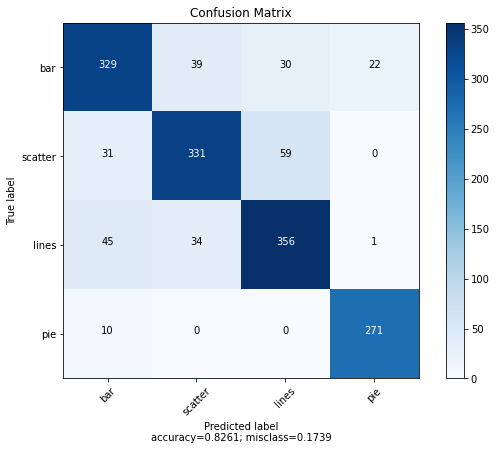

In [45]:
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0,1,2,3])
plot_confusion_matrix(cm = cm,normalize = False,
                          target_names = ['bar','scatter','lines','pie'],
                          title = "Confusion Matrix")

## RandomF


In [22]:
y = df_final['class']
#X = df_final[selected_columns]
X = df_final.iloc[: , 1:25]

In [23]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
rfc = RandomForestClassifier(bootstrap=True,
                              max_depth=10,
                              max_features='sqrt',
                              random_state=1)

rfc.fit(X3_train, y3_train)

RandomForestClassifier(max_depth=10, max_features='sqrt', random_state=1)

In [26]:
predictions = rfc.predict(X3_test)

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test,predictions)

0.7993569131832797

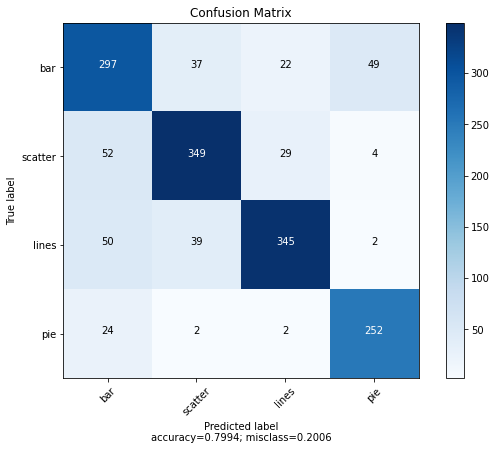

In [30]:
cm = confusion_matrix(y3_test, predictions, labels=[0,1,2,3])
plot_confusion_matrix(cm = cm,normalize = False,
                          target_names = ['bar','scatter','lines','pie'],
                          title = "Confusion Matrix")

In [31]:
from sklearn.metrics import f1_score
f1_score(y3_test,predictions, average=None)

array([0.7173913 , 0.81068525, 0.82733813, 0.85860307])

In [176]:
forest = RandomForestClassifier(random_state = 1)

In [136]:
from sklearn.model_selection import GridSearchCV
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(X3_train, y3_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   55.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed:  8.5min finished


In [137]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [138]:
predictions = bestF.predict(X3_test)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y3_test,predictions)

0.8347266881028939

In [131]:
predictions

array([[0., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]], dtype=float32)

In [139]:
accuracy_score(y3_test,predictions)

0.8347266881028939

In [116]:
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(y3_test, predictions)

print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.71198157 0.85929648 0.85781991 0.84717608]
recall: [0.76296296 0.78801843 0.83027523 0.91071429]
fscore: [0.73659118 0.82211538 0.84382284 0.8777969 ]
support: [405 434 436 280]


## KNN

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [62]:
y = df_final['class']
#X = df_final[['x type', 'y type']]
X = df_final.iloc[: , 1:25]

In [63]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y,test_size=0.3, random_state = 5)


In [64]:
knn_clf=KNeighborsClassifier()
knn_clf.fit(X4_train,y4_train)
ypred=knn_clf.predict(X4_test) #These are the predicted output values

KNeighborsClassifier()

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy_score(y4_test,ypred)

0.7633440514469454

In [67]:
from sklearn.model_selection import GridSearchCV
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range, weights = weight_options)
#print (param_grid)
knn = KNeighborsClassifier()
   
                   
grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'accuracy')
grid.fit(X4_train,y4_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [68]:
print (grid.best_params_)

{'n_neighbors': 12, 'weights': 'distance'}


In [69]:
y_pred =grid.predict(X4_test)

In [70]:
accuracy_score(y4_test,y_pred)

0.8

## Decision Tree


In [3]:
from sklearn.tree import DecisionTreeClassifier

In [4]:
y = df_final['class']
# X = df_final[['x avg', 'x kurt', 'x len', 'x maxoccur', 'x minoccur', 'x mono',
#        'x skew', 'x std', 'x type', 'x uniq', 'y avg', 'y kurt', 'y max',
#        'y maxoccur', 'y minoccur', 'y mono', 'y skew', 'y std', 'y type']]
X = df_final.iloc[: , 1:25]


In [5]:
from sklearn.model_selection import train_test_split
X5_train, X5_test, y5_train, y5_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [6]:
clf = DecisionTreeClassifier()

In [7]:
clf = clf.fit(X5_train,y5_train)

In [8]:
#Predict the response for test dataset
y_pred = clf.predict(X5_test)

In [9]:
from sklearn import metrics
metrics.accuracy_score(y5_test, y_pred)

0.8180064308681672

In [71]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [38]:
from sklearn.metrics import confusion_matrix
array = confusion_matrix(y5_test, y_pred)

[Text(1538.498042993591, 3190.695652173913, 'x uniq <= 144.5\ngini = 0.746\nsamples = 4016\nvalue = [1031, 1083, 1124, 778]\nclass = lines'),
 Text(944.7419126962441, 3048.886956521739, 'y avg <= 2.092\ngini = 0.734\nsamples = 3262\nvalue = [988, 1002, 494, 778]\nclass = scatter'),
 Text(399.0913093700318, 2907.0782608695654, 'y uniq <= 2.5\ngini = 0.652\nsamples = 1905\nvalue = [713, 782, 378, 32]\nclass = scatter'),
 Text(108.52464228934818, 2765.269565217391, 'y min <= 0.621\ngini = 0.54\nsamples = 320\nvalue = [199, 27, 81, 13]\nclass = bar'),
 Text(68.0127186009539, 2623.4608695652173, 'x len <= 136.0\ngini = 0.629\nsamples = 133\nvalue = [40, 21, 67, 5]\nclass = lines'),
 Text(46.130365659777425, 2481.6521739130435, 'y len <= 167.5\ngini = 0.556\nsamples = 115\nvalue = [40, 5, 65, 5]\nclass = lines'),
 Text(41.39904610492846, 2339.8434782608697, 'x min <= 0.5\ngini = 0.519\nsamples = 102\nvalue = [27, 5, 65, 5]\nclass = lines'),
 Text(18.925278219395867, 2198.0347826086954, 'y av

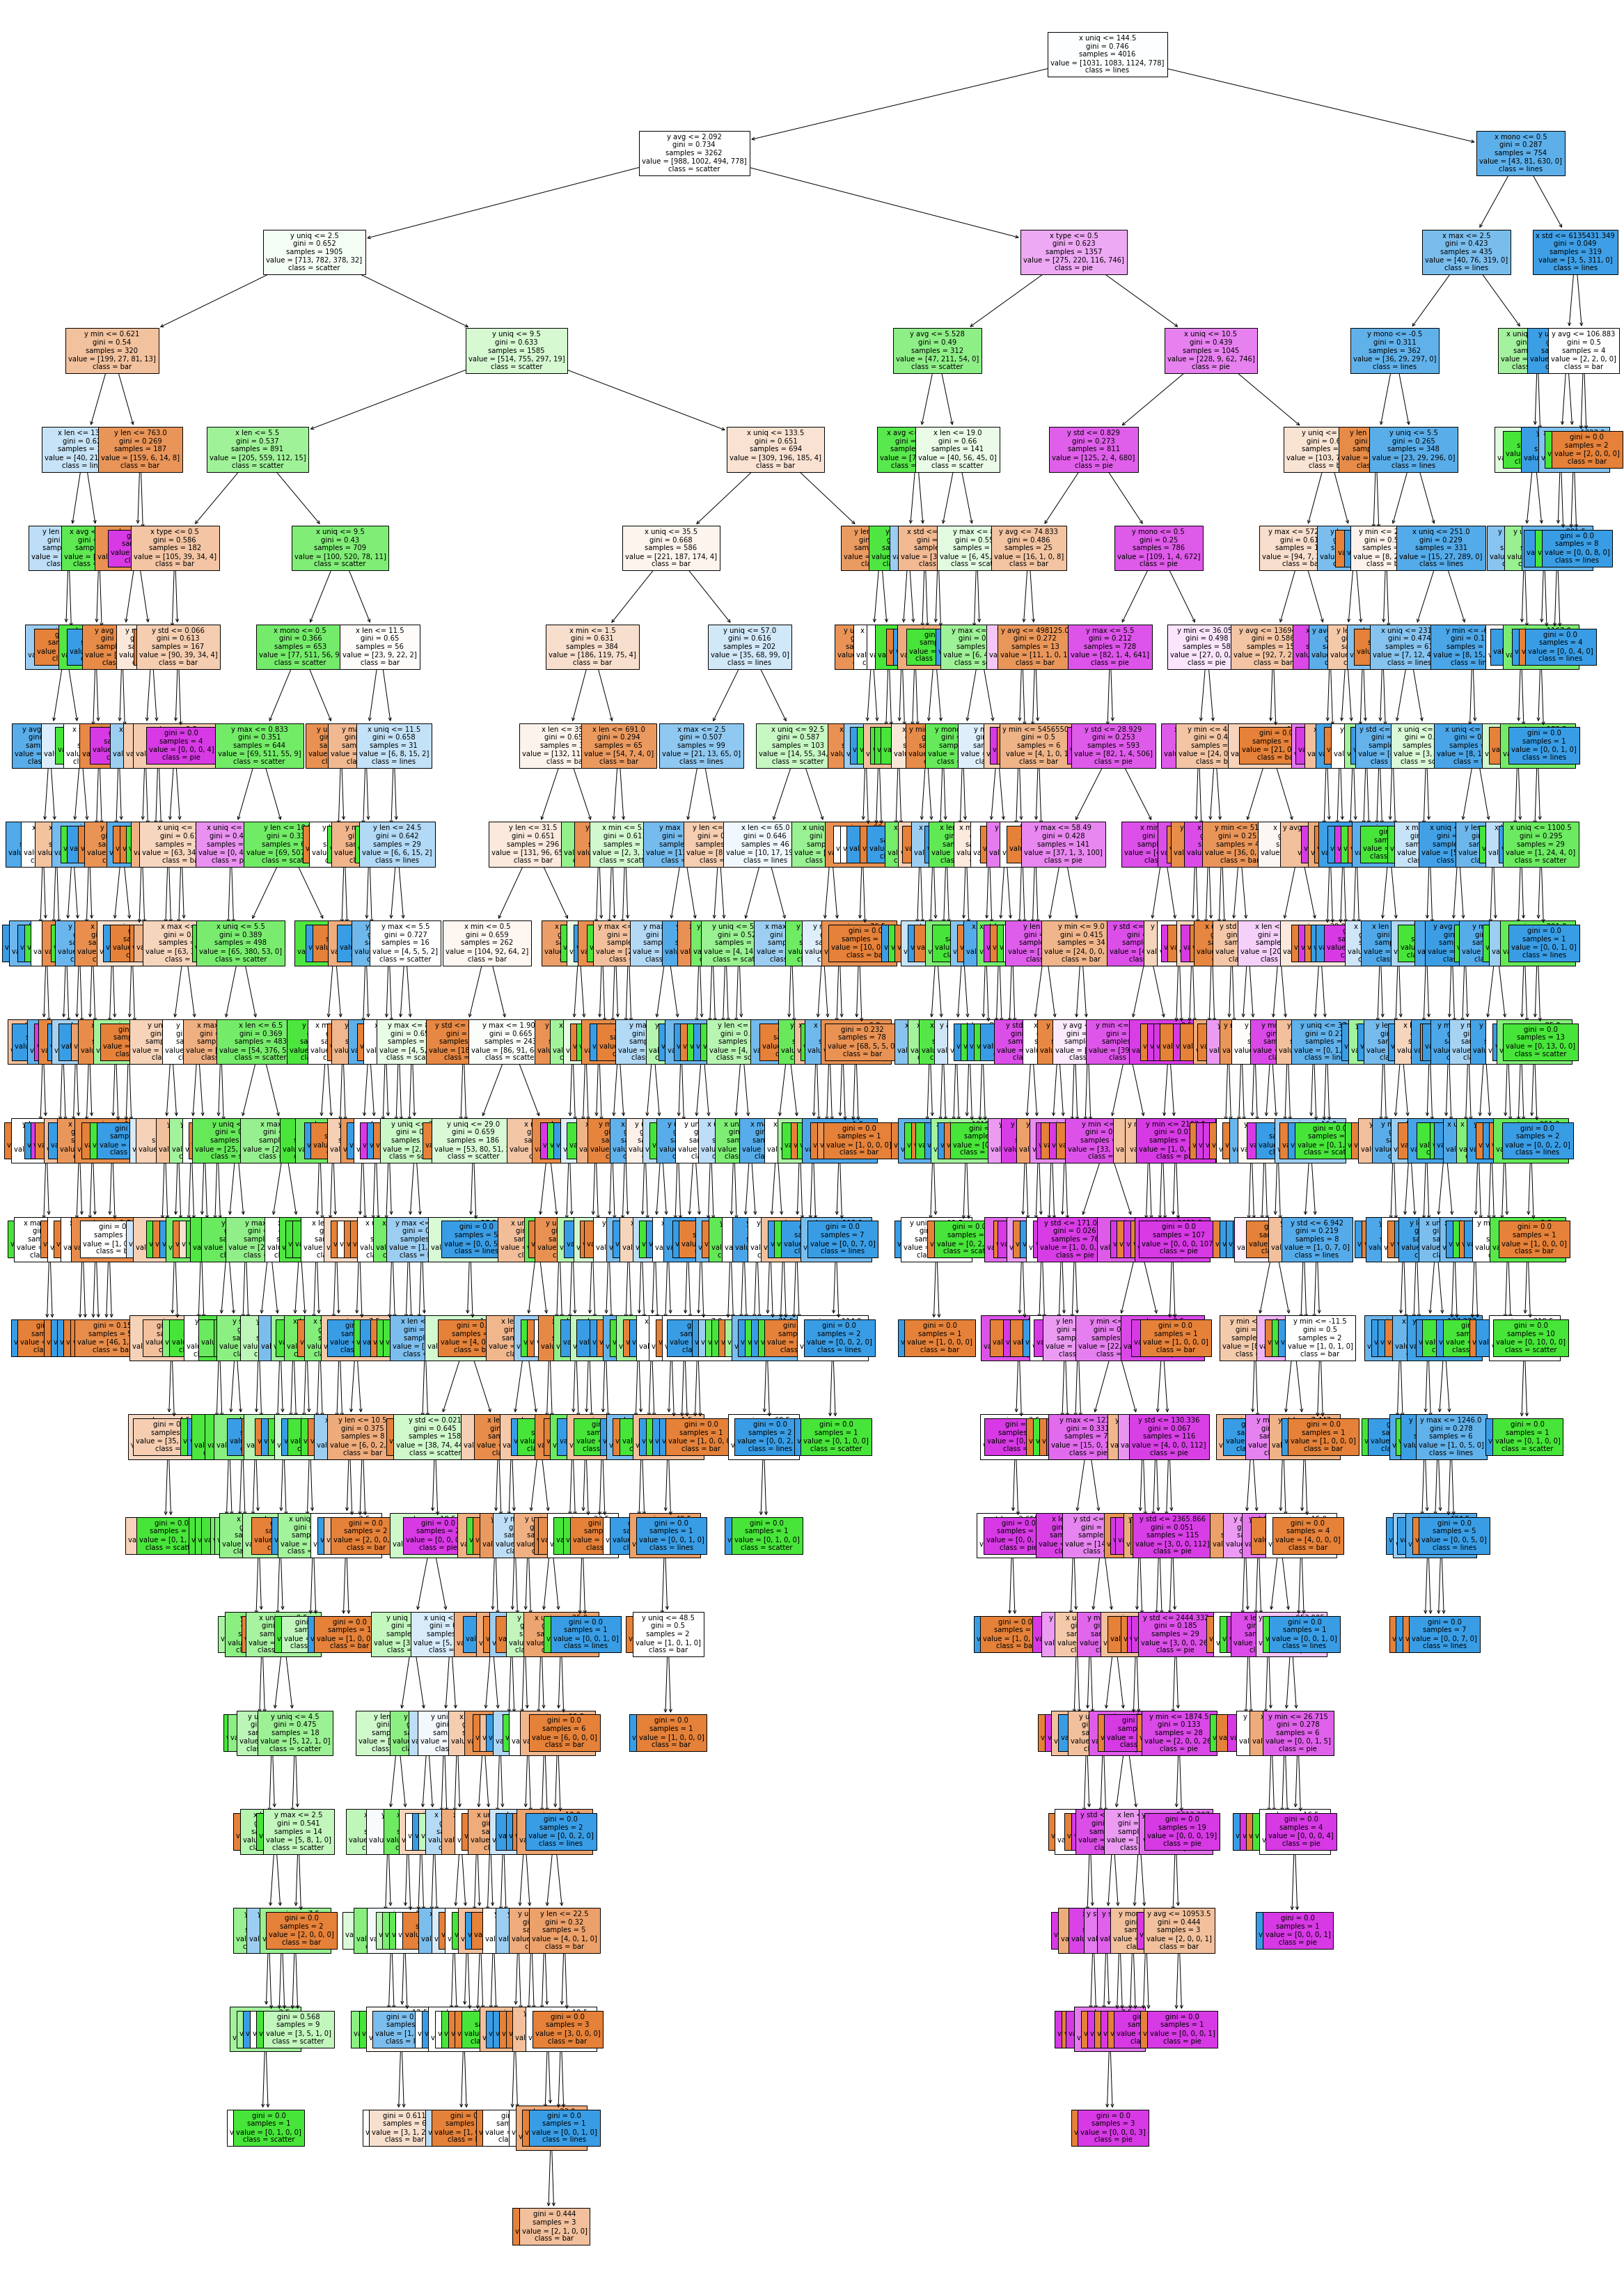

In [125]:
from sklearn import tree
fn=['x avg','x len', 'x max','x min','x mono','x std','x type','x uniq', 'y avg', 'y len', 'y max','y min','y mono','y std','y type','y uniq']
cn=['bar', 'scatter', 'lines','pie']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,60))
tree.plot_tree(clf,
               fontsize=10,
               feature_names = fn, 
               class_names=cn,
               filled = True);

fig.savefig('dectree1.png')

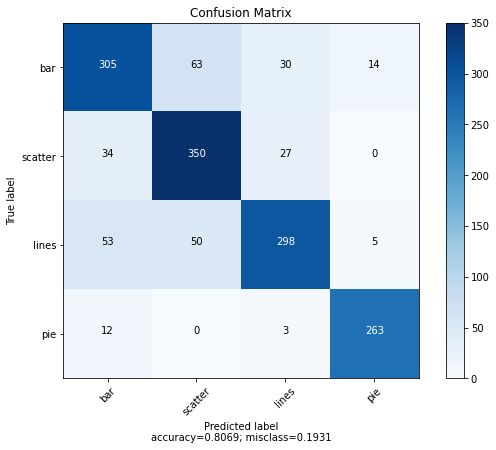

In [22]:
cm = confusion_matrix(y5_test, y_pred, labels=[0,1,2,3])
plot_confusion_matrix(cm = cm,normalize = False,
                          target_names = ['bar','scatter','lines','pie/'],
                          title = "Confusion Matrix")

In [13]:
dt = DecisionTreeClassifier(random_state=42)

In [10]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 20, 50],
    'criterion': ["gini", "entropy"]
}


In [14]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=10, n_jobs=-1, verbose=1, scoring = "accuracy")

In [15]:
grid_search.fit(X5_train, y5_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    4.8s finished


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [1, 2, 5, 20, 50]},
             scoring='accuracy', verbose=1)

In [20]:
print(grid_search.best_params_)

predictions = grid_search.predict(X5_test)

metrics.accuracy_score(y5_test,predictions)

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1}


0.8064308681672026

In [18]:
from sklearn  import metrics

## Feature Selection


In [46]:
ds = df_final.iloc[: , 1:26]
ds

,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,x std,...,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,1.996131e-07,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
1,0.000103,3.0,210,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,141,-0.031704,1,0,0.000000,0.000000e+00,0.0,20,2
2,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,1.996131e-07,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
3,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,2.006112e-07,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
4,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,2.006112e-07,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.000103,3.0,2,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,-1,0.000000,6.515437e-10,1.0,2,3
952,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
953,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
954,0.000103,3.0,10,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047620,0,-0.031651,0,-1,0.608298,4.656042e-06,1.0,10,3


<Figure size 1296x720 with 0 Axes>

<AxesSubplot:>

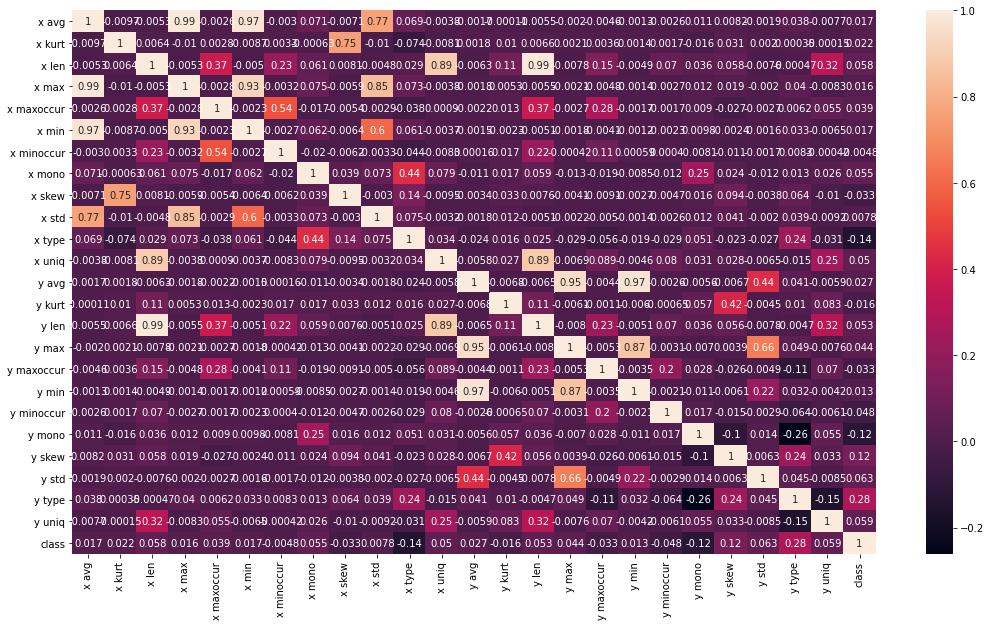

In [47]:
corr = ds.corr()
plt.figure(figsize=(18,10))
sns.heatmap(corr,annot=True)

In [48]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = ds.columns[columns]
data_high = ds[selected_columns]


data_high

,x avg,x kurt,x len,x maxoccur,x minoccur,x mono,x skew,x std,x type,x uniq,y avg,y kurt,y maxoccur,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,0.000103,-1.2,200,0,0,1,0.0,1.996131e-07,1.0,200,2.863802e-08,3.000000,1,1,0,0.000000,0.000000e+00,0.0,200,2
1,0.000103,3.0,210,1,1,0,0.0,0.000000e+00,0.0,210,2.863802e-08,3.000000,141,1,0,0.000000,0.000000e+00,0.0,20,2
2,0.000103,-1.2,200,0,0,1,0.0,1.996131e-07,1.0,200,2.863802e-08,3.000000,1,1,0,0.000000,0.000000e+00,0.0,200,2
3,0.000103,-1.2,201,0,0,1,0.0,2.006112e-07,1.0,201,2.863802e-08,3.000000,2,1,0,0.000000,0.000000e+00,0.0,200,2
4,0.000103,-1.2,201,0,0,1,0.0,2.006112e-07,1.0,201,2.863802e-08,3.000000,2,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.000103,3.0,2,1,1,0,0.0,0.000000e+00,0.0,2,3.005059e-08,-2.000000,0,0,-1,0.000000,6.515437e-10,1.0,2,3
952,0.000103,3.0,5,1,1,0,0.0,0.000000e+00,0.0,5,2.877928e-08,-1.543724,0,0,0,0.306628,2.781277e-10,1.0,5,3
953,0.000103,3.0,5,1,1,0,0.0,0.000000e+00,0.0,5,2.877928e-08,-1.543724,0,0,0,0.306628,2.781277e-10,1.0,5,3
954,0.000103,3.0,10,1,1,0,0.0,0.000000e+00,0.0,10,3.058906e-06,-0.635259,0,0,-1,0.608298,4.656042e-06,1.0,10,3


In [49]:
# These are the features
selected_columns

Index(['x avg', 'x kurt', 'x len', 'x maxoccur', 'x minoccur', 'x mono',
       'x skew', 'x std', 'x type', 'x uniq', 'y avg', 'y kurt', 'y maxoccur',
       'y minoccur', 'y mono', 'y skew', 'y std', 'y type', 'y uniq', 'class'],
      dtype='object')

In [50]:
ds

,x avg,x kurt,x len,x max,x maxoccur,x min,x minoccur,x mono,x skew,x std,...,y max,y maxoccur,y min,y minoccur,y mono,y skew,y std,y type,y uniq,class
0,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,1.996131e-07,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
1,0.000103,3.0,210,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,141,-0.031704,1,0,0.000000,0.000000e+00,0.0,20,2
2,0.000103,-1.2,200,-0.044135,0,-0.036945,0,1,0.0,1.996131e-07,...,-0.047793,1,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
3,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,2.006112e-07,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
4,0.000103,-1.2,201,-0.044135,0,-0.036945,0,1,0.0,2.006112e-07,...,-0.047793,2,-0.031704,1,0,0.000000,0.000000e+00,0.0,200,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,0.000103,3.0,2,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,-1,0.000000,6.515437e-10,1.0,2,3
952,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
953,0.000103,3.0,5,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047793,0,-0.031704,0,0,0.306628,2.781277e-10,1.0,5,3
954,0.000103,3.0,10,-0.044138,1,-0.036945,1,0,0.0,0.000000e+00,...,-0.047620,0,-0.031651,0,-1,0.608298,4.656042e-06,1.0,10,3


### Running ANN model after Feature Selection

In [55]:
y = data_high['class']
X = data_high[['x avg', 'x kurt', 'x len', 'x maxoccur', 'x minoccur', 'x mono',
       'x skew', 'x std', 'x type', 'x uniq', 'y avg', 'y kurt', 'y maxoccur',
       'y minoccur', 'y mono', 'y skew', 'y std', 'y type', 'y uniq']]

X = np.array(X)
y = np.array(y)

In [56]:
# first neural network with keras tutorial
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [57]:
from tensorflow.keras.utils import to_categorical

encoded = to_categorical(y)
y = encoded

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
# define the keras model
model = Sequential()
model.add(Dense(8, input_dim=19, activation='tanh'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(70, activation='tanh'))
model.add(Dense(60, activation='relu'))
model.add(Dense(50, activation='tanh'))
model.add(Dense(80, activation='tanh'))
model.add(Dense(4, activation='softmax'))

# compile the keras model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit the keras model on the dataset
model.fit(X_train,y_train, epochs=400)

Epoch 1/400
49/49 [==============================] - 1s 4ms/step - loss: 1.3066 - accuracy: 0.3665
Epoch 2/400
49/49 [==============================] - 0s 5ms/step - loss: 1.1083 - accuracy: 0.5257
Epoch 3/400
49/49 [==============================] - 0s 5ms/step - loss: 0.9155 - accuracy: 0.6207
Epoch 4/400
49/49 [==============================] - 0s 5ms/step - loss: 0.8577 - accuracy: 0.6483
Epoch 5/400
49/49 [==============================] - 0s 4ms/step - loss: 0.8442 - accuracy: 0.6528
Epoch 6/400
49/49 [==============================] - 0s 4ms/step - loss: 0.8124 - accuracy: 0.6739
Epoch 7/400
49/49 [==============================] - 0s 4ms/step - loss: 0.7880 - accuracy: 0.6849
Epoch 8/400
49/49 [==============================] - 0s 4ms/step - loss: 0.7790 - accuracy: 0.6951
Epoch 9/400
49/49 [==============================] - 0s 4ms/step - loss: 0.7679 - accuracy: 0.6983
Epoch 10/400
49/49 [==============================] - 0s 4ms/step - loss: 0.7626 - accuracy: 0.7003
Epoch 11/

49/49 [==============================] - 0s 4ms/step - loss: 0.6249 - accuracy: 0.7561: 0s - loss: 0.6264 - accuracy: 0.75
Epoch 83/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6384 - accuracy: 0.7445
Epoch 84/400
49/49 [==============================] - 0s 5ms/step - loss: 0.6326 - accuracy: 0.7420
Epoch 85/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6317 - accuracy: 0.7529
Epoch 86/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6266 - accuracy: 0.7522
Epoch 87/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6158 - accuracy: 0.7619
Epoch 88/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6230 - accuracy: 0.7529
Epoch 89/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6214 - accuracy: 0.7535
Epoch 90/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6200 - accuracy: 0.7535
Epoch 91/400
49/49 [==============================] - 0s 4ms/step - loss: 0.6

49/49 [==============================] - 0s 4ms/step - loss: 0.5707 - accuracy: 0.7754
Epoch 164/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5790 - accuracy: 0.7721
Epoch 165/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5762 - accuracy: 0.7728
Epoch 166/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5739 - accuracy: 0.7754
Epoch 167/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5622 - accuracy: 0.7831
Epoch 168/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7786
Epoch 169/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5614 - accuracy: 0.7831
Epoch 170/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5758 - accuracy: 0.7715
Epoch 171/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5701 - accuracy: 0.7741
Epoch 172/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5769 - accuracy: 0.7760
Epoc

49/49 [==============================] - 0s 4ms/step - loss: 0.5543 - accuracy: 0.7850
Epoch 245/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5481 - accuracy: 0.7882
Epoch 246/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5486 - accuracy: 0.7901
Epoch 247/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7888
Epoch 248/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5462 - accuracy: 0.7895
Epoch 249/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5433 - accuracy: 0.7831
Epoch 250/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5429 - accuracy: 0.7882
Epoch 251/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.7895
Epoch 252/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5416 - accuracy: 0.7927
Epoch 253/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5732 - accuracy: 0.7779
Epoc

49/49 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.7798
Epoch 326/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5478 - accuracy: 0.7805
Epoch 327/400
49/49 [==============================] - 0s 5ms/step - loss: 0.5646 - accuracy: 0.7766
Epoch 328/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5163 - accuracy: 0.7895
Epoch 329/400
49/49 [==============================] - 0s 4ms/step - loss: 0.5026 - accuracy: 0.7927
Epoch 330/400
49/49 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.8017
Epoch 331/400
49/49 [==============================] - 0s 4ms/step - loss: 0.4875 - accuracy: 0.8055
Epoch 332/400
49/49 [==============================] - 0s 4ms/step - loss: 0.4772 - accuracy: 0.8132
Epoch 333/400
49/49 [==============================] - 0s 4ms/step - loss: 0.4969 - accuracy: 0.7959
Epoch 334/400
49/49 [==============================] - 0s 4ms/step - loss: 0.4817 - accuracy: 0.8094
Epoc

In [63]:
model.evaluate(X_test,y_test)

49/49 [==============================] - 0s 3ms/step - loss: 0.4809 - accuracy: 0.8171


[0.48088812828063965, 0.8170731663703918]

In [64]:
predictions=model.predict(X_test)

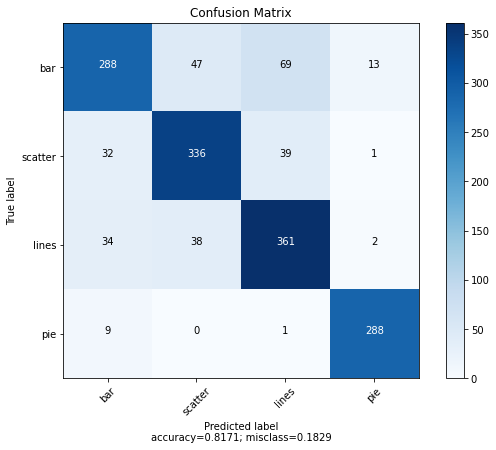

In [65]:
cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1), labels=[0,1,2,3])
plot_confusion_matrix(cm = cm,normalize = False,
                          target_names = ['bar','scatter','lines','pie'],
                          title = "Confusion Matrix")

## Optimizing Hyperparameters

In [ ]:
! pip install -U keras-tuner

In [66]:
y = df_final['class']
X = df_final.iloc[:,1:25]

In [67]:
X = np.array(X)
y = np.array(y)

In [68]:
from tensorflow.keras.utils import to_categorical

encoded = to_categorical(y)
y = encoded

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch

In [71]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [72]:
def build_model(hp):
    model = keras.Sequential()
    model.add(Dense(8, input_dim=24, activation='tanh'))
    for i in range(hp.Int('layers',2,5)):
        model.add(tf.keras.layers.Dense(
        units = hp.Int('units_'+str(i), 50, 100, step=10),
        activation = hp.Choice('act_'+str(i),['relu','tanh'])))
    model.add(Dense(4, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [73]:
tuner = RandomSearch(build_model,
                    objective = 'val_accuracy',
                    max_trials = 4,
                    executions_per_trial=1,
                     directory = 'MYDir',
                     project_name='proj5'
                    )

In [74]:
tuner.search_space_summary()

Search space summary
Default search space size: 5
layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 5, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_0 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 50, 'max_value': 100, 'step': 10, 'sampling': None}
act_1 (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'tanh'], 'ordered': False}


In [75]:
tuner.search(X_train,y_train,epochs=100,validation_data=(X_test,y_test))

Trial 4 Complete [00h 01m 00s]
val_accuracy: 0.7767083644866943

Best val_accuracy So Far: 0.7795957922935486
Total elapsed time: 00h 04m 23s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()